In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# upload the data
df = pd.read_csv('df.csv')

In [3]:
# give meaningful names to columns
df = df.rename(columns = {'EventGroup2' : 'Sport',
                          'EventGroup3' : 'LeagueCountry',
                          'EventGroup4' : 'LeagueName'})

In [4]:
# inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546814 entries, 0 to 3546813
Data columns (total 12 columns):
Country              object
PlayerID             int64
Punter Category      object
combination_id       float64
Cash turnover        float64
Cash winnings        float64
Sport                object
LeagueCountry        object
LeagueName           object
CombinationStatus    object
Cash result          float64
Month                object
dtypes: float64(4), int64(1), object(7)
memory usage: 324.7+ MB


In [5]:
df = df.sample(10000) # sample 10.000
df[['CountryCode', 'PlayerCountry']] = df['Country'].str.split(' - ', expand=True)
df = df[df.Sport == 'Football']
df = df[['PlayerCountry', 'Punter Category', 'combination_id', 'LeagueCountry', 'LeagueName', 'CombinationStatus']]
df.LeagueName[df.LeagueName == '-'] = df.LeagueName.replace('-', df.LeagueCountry)

In [6]:
df.head()

,PlayerCountry,Punter Category,combination_id,LeagueCountry,LeagueName,CombinationStatus
2200304,Sweden,Normal,2802876632.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST
1286363,Germany,Normal,2798157434.000,England,Professional Development League,CASHED IN
1634496,United Kingdom,VIP,2392196576.000,France,Ligue 2,LOST
1404830,Norway,Normal,2815448916.000,England,The Championship,LOST
1446813,Finland,Normal,2813154706.000,Estonia,Esiliiga,LOST


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 2200304 to 742552
Data columns (total 6 columns):
PlayerCountry        6463 non-null object
Punter Category      6463 non-null object
combination_id       6463 non-null float64
LeagueCountry        6463 non-null object
LeagueName           6459 non-null object
CombinationStatus    6463 non-null object
dtypes: float64(1), object(5)
memory usage: 673.4+ KB


In [8]:
# unique combination_id by LeagueCountry
df.groupby('LeagueCountry')['combination_id'].count().sort_values(ascending = False)

LeagueCountry
England                               1087
Spain                                  483
Germany                                378
Italy                                  327
Sweden                                 276
Netherlands                            247
France                                 239
World Cup Qualifying - Europe          234
Champions League                       232
Norway                                 184
Denmark                                159
Brazil                                 138
Europa League                          114
Argentina                              111
Finland                                106
Belgium                                103
Champions League Qual.                  81
Scotland                                80
Japan                                   79
USA                                     78
Australia                               75
Russia                                  74
Club Friendly Matches                   

In [9]:
# unique combination_id by LeagueName
df.groupby('LeagueName')['combination_id'].count().sort_values(ascending = False)

LeagueName
Premier League                        615
LaLiga                                325
Serie A                               239
World Cup Qualifying - Europe         233
Champions League                      232
Bundesliga                            202
Ligue 1                               194
The Championship                      184
Eredivisie                            156
Allsvenskan                           154
Primera Division                      138
Europa League                         114
League One                            112
Superligaen                            91
EFL Cup                                86
Champions League Qual.                 81
Jupiler Pro League                     80
Eliteserien                            76
Série A                                76
League Two                             71
LaLiga2                                71
Club Friendly Matches                  71
Super League                           66
Veikkausliiga          

In [11]:
# unique Punter Category by combinbation_id
df.groupby('Punter Category')['combination_id'].count().sort_values(ascending = False)

Punter Category
VIP        3293
Normal     3007
Wiseguy     127
Arber        36
Name: combination_id, dtype: int64

In [12]:
# dummy variable encoding
dt = pd.get_dummies(df, columns = ['PlayerCountry', 'LeagueCountry', 'LeagueName'])

In [13]:
# clustering algorithm
X = dt.iloc[:, 3:]
Z = linkage(X, method = 'average', metric = 'euclidean')
c = cophenet(Z, pdist(X))

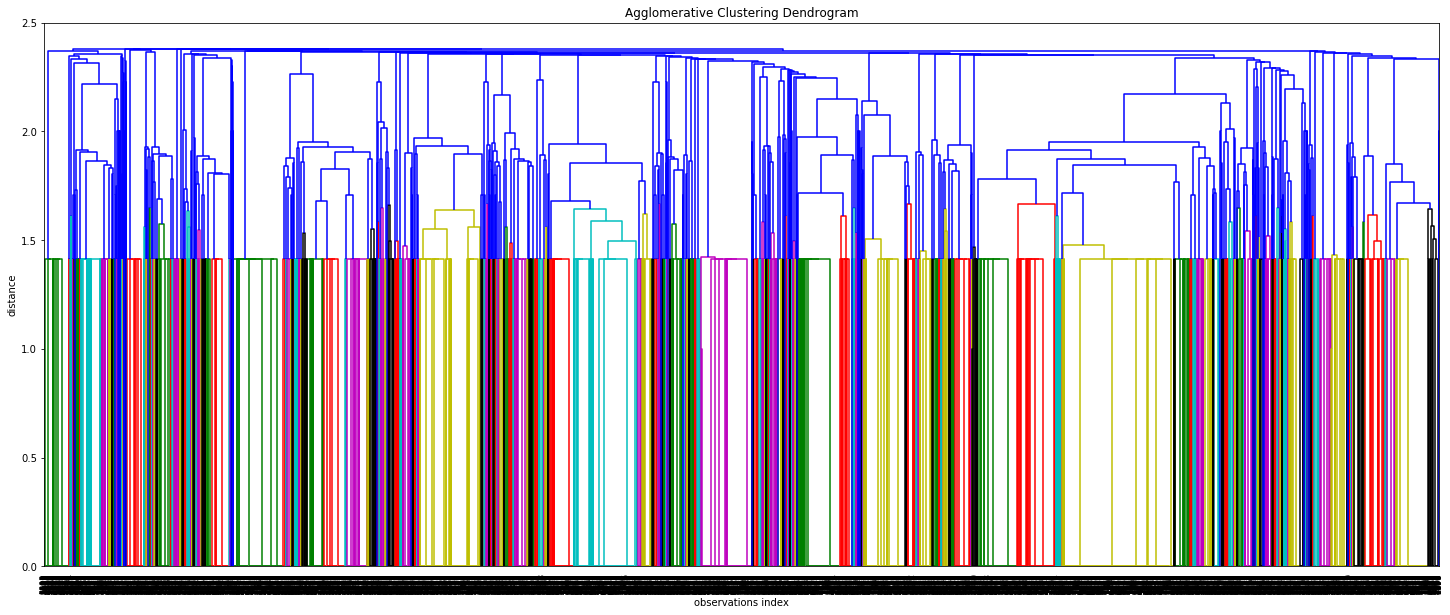

In [14]:
# plotting
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('observations index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8
)
plt.show()

In [15]:
# results inspection
max_d = 2.0
clusters = fcluster(Z, max_d, criterion='distance')
clusters_df = pd.DataFrame(clusters, columns = ['cluster'])
data = pd.concat([df.reset_index(drop = True), clusters_df.reset_index(drop = True)], axis=1)

In [16]:
data.head()

,PlayerCountry,Punter Category,combination_id,LeagueCountry,LeagueName,CombinationStatus,cluster
0,Sweden,Normal,2802876632.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80
1,Germany,Normal,2798157434.000,England,Professional Development League,CASHED IN,81
2,United Kingdom,VIP,2392196576.000,France,Ligue 2,LOST,76
3,Norway,Normal,2815448916.000,England,The Championship,LOST,81
4,Finland,Normal,2813154706.000,Estonia,Esiliiga,LOST,3


In [17]:
ourClusters = pd.DataFrame({'uniqueLeague' : clusters})
ourClusters.uniqueLeague.value_counts()

81     1125
47      483
32      379
40      327
71      276
105     247
76      239
57      234
30      232
5       185
25      162
44      145
79      138
1       114
18      106
104     103
16       81
95       80
85       79
77       78
61       75
52       72
101      72
103      61
49       57
100      56
31       53
43       52
78       48
39       47
       ... 
86        7
91        7
51        7
58        7
13        6
21        6
93        6
72        6
26        5
70        5
10        5
48        5
9         4
8         4
66        4
65        4
64        4
33        4
106       3
27        3
29        3
12        3
6         3
67        2
11        2
75        2
28        2
14        2
50        2
15        1
Name: uniqueLeague, Length: 106, dtype: int64

In [18]:
data[data['cluster']==80]

,PlayerCountry,Punter Category,combination_id,LeagueCountry,LeagueName,CombinationStatus,cluster
0,Sweden,Normal,2802876632.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80
10,Finland,Normal,2846019889.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80
53,United Kingdom,Normal,2411111725.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,WON,80
639,United Kingdom,Normal,2410756040.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,WON,80
679,United Kingdom,Normal,2378116777.000,World Cup Qualifying - Asia,NaN,LOST,80
756,Norway,Normal,2373766922.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80
1125,United Kingdom,VIP,2416549773.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80
1505,Sweden,VIP,2373705037.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80
1538,Finland,VIP,2802421352.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80
1691,Canada,Normal,2795516674.000,World Cup Qualifying - Asia,World Cup Qualifying - Asia,LOST,80


In [19]:
data[data['cluster']==102]

,PlayerCountry,Punter Category,combination_id,LeagueCountry,LeagueName,CombinationStatus,cluster
5,United Kingdom,Normal,2412015063.000,International Youth Friendlies,Under 20,LOST,102
9,Sweden,VIP,2840304403.000,International Youth Friendlies,Under 20,LOST,102
801,Netherlands,Normal,2832958693.000,International Youth Friendlies,Under 19,LOST,102
903,Sweden,Normal,2801715581.000,International Youth Friendlies,Under 20,LOST,102
1078,Finland,Normal,2798180632.000,International Youth Friendlies,Under 19,LOST,102
1888,Norway,VIP,2801622484.000,International Youth Friendlies,Under 19,LOST,102
2566,Norway,VIP,2774146848.000,International Youth Friendlies,Under 19,WON,102
2630,Sweden,Normal,2840316913.000,International Youth Friendlies,Under 20,WON,102
2674,United Kingdom,VIP,2378216432.000,International Youth Friendlies,Under 19,LOST,102
3488,Netherlands,VIP,2801631069.000,International Youth Friendlies,Under 20,LOST,102


In [20]:
data[data['cluster']==23]

,PlayerCountry,Punter Category,combination_id,LeagueCountry,LeagueName,CombinationStatus,cluster
276,Denmark,Normal,2804256488.000,Guatemala,Liga Nacional,LOST,23
1332,Sweden,VIP,2792684514.000,Guatemala,Liga Nacional,LOST,23
1510,Netherlands,VIP,2778159741.000,Guatemala,Liga Nacional,LOST,23
1540,United Kingdom,VIP,2356851023.000,Honduras,Liga Nacional,LOST,23
1568,United Kingdom,VIP,2356850988.000,Honduras,Liga Nacional,LOST,23
2614,Netherlands,Normal,2852139495.000,Honduras,Liga Nacional,LOST,23
2823,Finland,VIP,2407999769.000,Honduras,Liga Nacional,LOST,23
4445,Denmark,Normal,2830797253.000,Honduras,Liga Nacional,LOST,23
5249,United Kingdom,VIP,2861467922.000,Honduras,Liga Nacional,LOST,23
5465,Sweden,Normal,2871977486.000,Honduras,Liga Nacional,WON,23


***

In [22]:
# the algorithm clusters datasets based on LeagueCountry (and hence LeagueName)

# the clusters are confirmed by the descriptive analysis of the frequency distributions of combination_ids

# we can use HCA to dig deeper into the groups if we want to (larger or smaller ones) - it's a more structured way of doing things